In [5]:
# =============================================================================
# # 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils

# Set a visual style
sns.set_style("whitegrid")

In [6]:
# =============================================================================
# # 2. DATA LOADING AND PREPROCESSING
# =============================================================================
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# --- Data Normalization ---
# Scale pixel values to be between 0 and 1. This is a crucial step for neural networks.
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the class names for later visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("--- Data Loaded and Preprocessed ---")
print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")
print("\n" + "="*50 + "\n")

--- Data Loaded and Preprocessed ---
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)




In [7]:
# =============================================================================
# # 3. BUILDING THE CONVOLUTIONAL NEURAL NETWORK (CNN)
# =============================================================================
model = models.Sequential()
# --- Convolutional Base ---
# Layer 1: Convolutional layer to find features (e.g., edges). 32 filters, 3x3 kernel size.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Layer 2: Pooling layer to downsample and reduce dimensions.
model.add(layers.MaxPooling2D((2, 2)))
# Layer 3: Another convolutional layer to find more complex patterns.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Layer 4: Another pooling layer.
model.add(layers.MaxPooling2D((2, 2)))
# Layer 5: A final convolutional layer.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# --- Classifier Head ---
# Layer 6: Flatten the 3D output from the conv base into a 1D vector.
model.add(layers.Flatten())
# Layer 7: A standard fully-connected (Dense) layer.
model.add(layers.Dense(64, activation='relu'))
# Layer 8: The output layer. 10 neurons (one for each class) with softmax activation.
model.add(layers.Dense(10, activation='softmax'))

# Print the model architecture
print("--- CNN Model Architecture ---")
model.summary()

--- CNN Model Architecture ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# =============================================================================
# # 4. COMPILING AND TRAINING THE MODEL
# =============================================================================
# Compile the model with an optimizer, loss function, and metrics to track.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("--- Starting Model Training ---")
# Train the model. This may take a few minutes depending on your hardware.
# We train for 15 epochs, which is 15 passes over the entire training dataset.
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))
print("--- Model Training Complete ---")

--- Starting Model Training ---
Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.3514 - loss: 1.7546 - val_accuracy: 0.5511 - val_loss: 1.2472
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5718 - loss: 1.2049 - val_accuracy: 0.6148 - val_loss: 1.0808
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6306 - loss: 1.0359 - val_accuracy: 0.6545 - val_loss: 0.9838
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6667 - loss: 0.9355 - val_accuracy: 0.6485 - val_loss: 0.9849
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6983 - loss: 0.8676 - val_accuracy: 0.6823 - val_loss: 0.9053
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7200 - loss: 0.7933 - val_accuracy: 0.6901 - val_loss: 0.8884
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7363 - loss: 0.7453 - val_accuracy: 0.6977 - val_loss: 0.8648
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21

313/313 - 1s - 4ms/step - accuracy: 0.7080 - loss: 0.9220

Test accuracy: 0.71


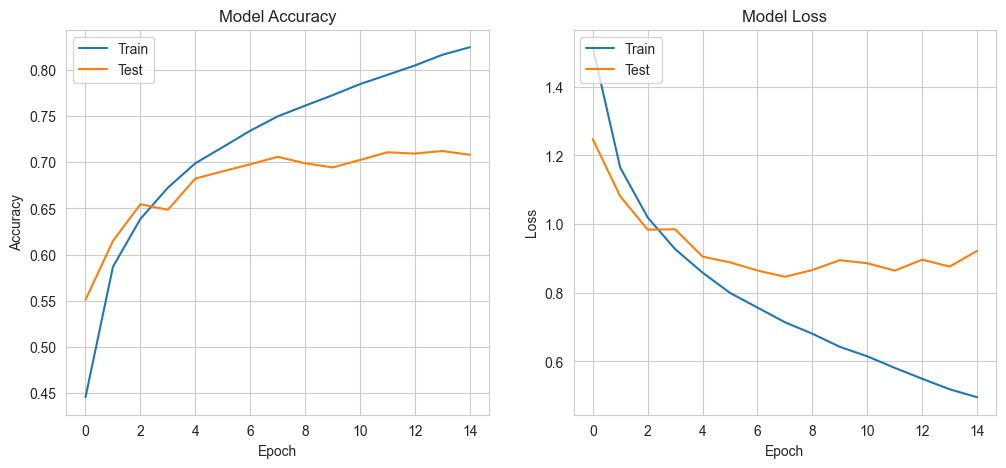

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


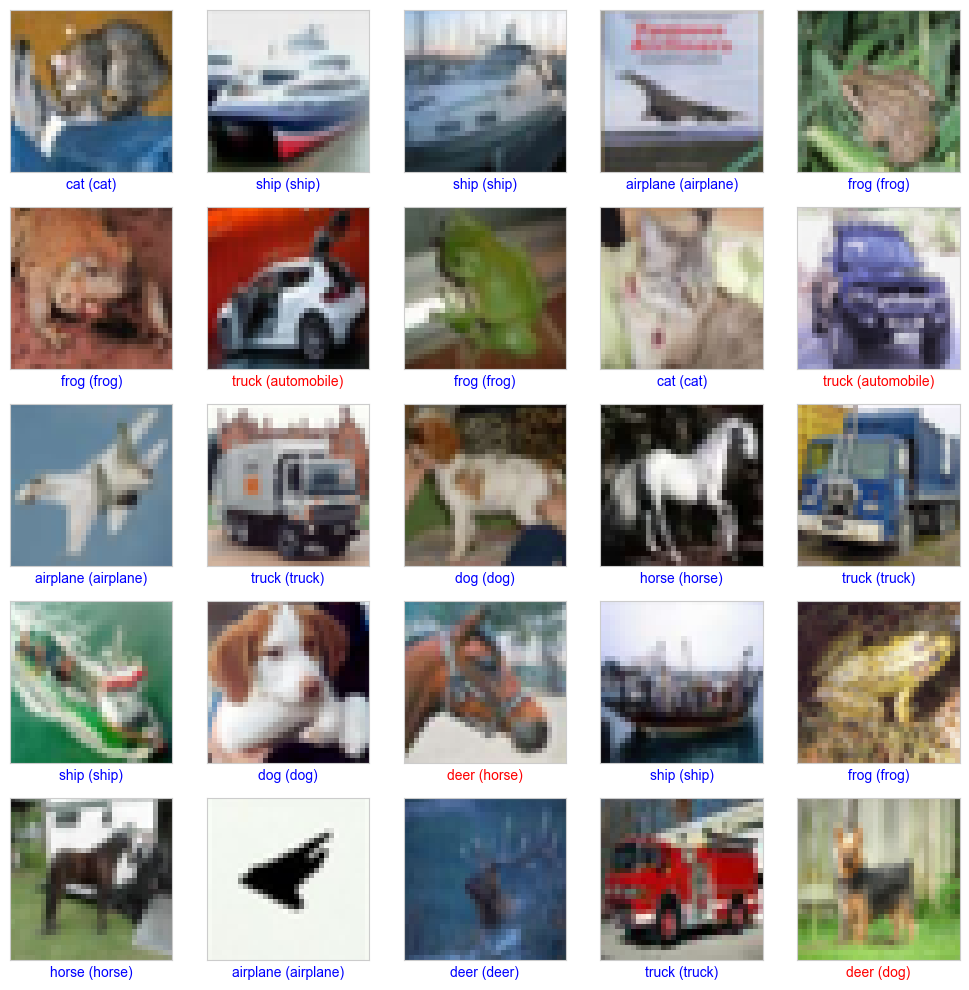

In [10]:
# =============================================================================
# # 5. EVALUATING THE MODEL AND VISUALIZING RESULTS
# =============================================================================
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('training_history.png')
plt.show()

# --- VISUALIZE PREDICTIONS ---
# Make predictions on the test set
predictions = model.predict(test_images)

# Display a grid of images with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(25): # We'll look at the first 25 images
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.tight_layout()
plt.savefig('image_predictions.png') # Save for LinkedIn
plt.show()